## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
len(merged_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df["Mouse ID"] == "g989" ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_clean_df = merged_df[merged_df["Mouse ID"] != 'g989']
merged_clean_df.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [7]:
# Checking the number of mice in the clean DataFrame.
len(merged_clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

#  Summary Statistics Mean, Median, Variance, SD, and SEM of the Tumor Volume for each drug program

#Mean
avg_tumor_size = merged_clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].mean()

#Median
med_tumor_size = merged_clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].median()

#Variance
var_tumor_size = merged_clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].var()

#SD
std_tumor_size = merged_clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].std()

#SEM
sem_tumor_size = merged_clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].sem()

summary_stats1 = pd.DataFrame ({"Average Tumor Size": avg_tumor_size,
                               "Median Tumor Size": med_tumor_size,
                               "Variance Tumor Size": var_tumor_size,
                               "Standard Dev. Tumor Size": std_tumor_size,
                                "Std. Error Tumor Size" : sem_tumor_size
                                })
summary_stats1

# This method produces everything in a single groupby function.

merged_clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

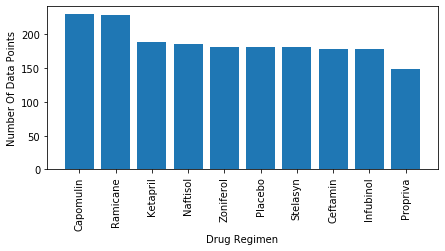

In [10]:
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study using pandas.

counts = merged_clean_df["Drug Regimen"].value_counts()
plt.figure(figsize=(7,3))
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number Of Data Points")

plt.show()

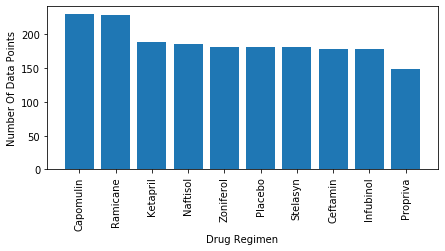

In [11]:
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study using pyplot.

counts = merged_clean_df["Drug Regimen"].value_counts()
plt.figure(figsize=(7,3))
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number Of Data Points")

plt.show()

## Pie Plots

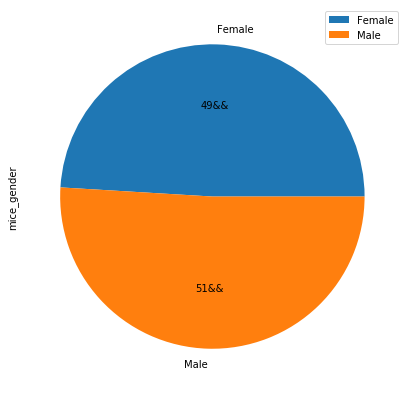

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender=merged_clean_df.groupby('Sex')["Mouse ID"].count()
df = pd.DataFrame({'mice_gender': mice_gender})
df.plot.pie(y='mice_gender', figsize=(7,7), autopct = '%1.lf&&')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

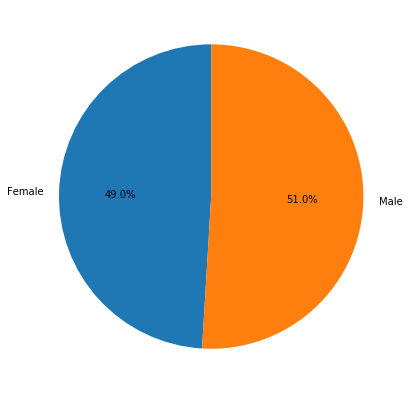

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(7,7))
plt.pie(mice_gender.values, labels=mice_gender.index.values, autopct='%1.1f%%', startangle=90)
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_tumor = merged_clean_df.groupby("Mouse ID")["Timepoint"].max()
max_tumor = max_tumor.reset_index()


#Merge Data here to later use - you are mergeing clean_data with max_tumor data
merged_data_clean_max = max_tumor.merge(merged_clean_df, on=["Mouse ID", "Timepoint"], how="left")

In [28]:
#treatment capsule - a list that holds treatment names 
#this list will be looped through later in the code **
list_of_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create an empty list - this list will hold the tumor vol data - this data will be used for plotting later in the code ***
tumor_vol_data = []

#FunPart - Looping

#Create a loop that iterates throught the list of treatments 
for drug in list_of_treatments:
    #locate the rows with mice - which drug contains mice data and what is the data? - the questions this variable holds
    #grab the merged clean and max data variable - then lock in on AND merge the desired colums - allow drug regimen to equate to your 
    #loop index variable
    rows_with_mice_data = merged_data_clean_max.loc[merged_data_clean_max["Drug Regimen"] == drug, "Tumor Volume (mm3)"] 
    
    #once teh data has been accounted for you - place the gatherd data into the empty list for safe keepings - till later in the code
    tumor_vol_data.append(rows_with_mice_data)
    
    
    #Code the outliers usng upper and lower bound
    the_quartiles = rows_with_mice_data.quantile([.25, .75, .5])
    #determine upper and lower
    upper = the_quartiles[0.75]
    lower = the_quartiles[0.25]
    #What variable is needed to determine the lower and upper bound? 
    #subtract the upper quartile from the lower quartile 
    iqr = upper - lower
    lower_bound_math = lower - (1.5 * iqr)
    upper_bound_math = upper + (1.5 * iqr)
    outliers_data = rows_with_mice_data.loc[(rows_with_mice_data < lower_bound_math) | (rows_with_mice_data > upper_bound_math)]
    
    print(f"{drug}'s potential outliers: {outliers_data}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


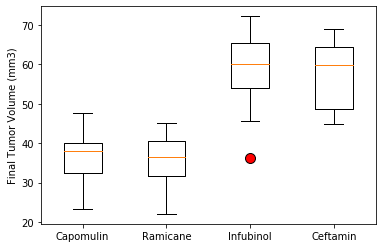

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor= 'red',markersize=10)
plt.boxplot(tumor_vol_data, labels=list_of_treatments, flierprops=orange_out)
           
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor size (mm3)')

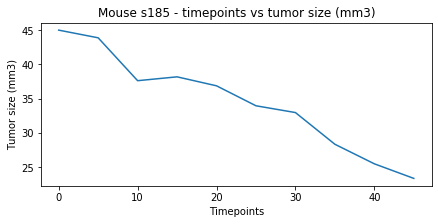

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data_Capomulin = merged_clean_df[merged_clean_df["Drug Regimen"] == "Capomulin"]
data_Capomulin_s185 = data_Capomulin[data_Capomulin["Mouse ID"] == 's185']
plt.figure(figsize=(7,3))
plt.plot(data_Capomulin_s185["Timepoint"], data_Capomulin_s185["Tumor Volume (mm3)"])
plt.title ("Mouse s185 - timepoints vs tumor size (mm3)")
plt.xlabel("Timepoints")
plt.ylabel ("Tumor size (mm3)")

Text(0, 0.5, 'Weights (g)')

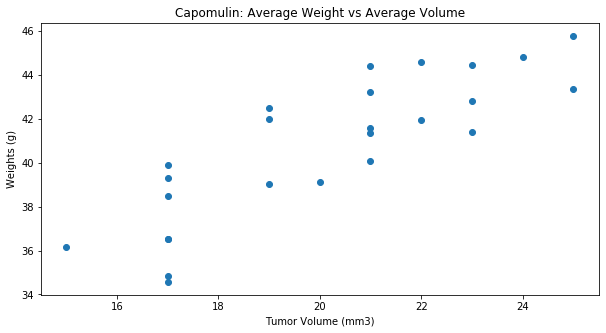

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

avg_Capomulin = data_Capomulin.groupby("Mouse ID").mean()
plt.figure(figsize=(10,5))
plt.scatter(avg_Capomulin["Weight (g)"], avg_Capomulin["Tumor Volume (mm3)"])
plt.title("Capomulin: Average Weight vs Average Volume")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weights (g)")
                           

## Correlation and Regression

The Correlation Coefficient is:  0.8419363424694717
The p)value is:  1.322572243471279e-07


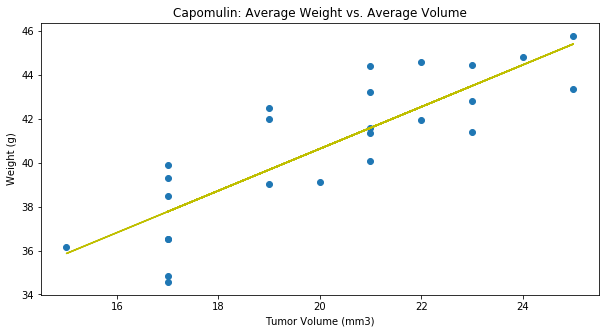

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation, p_val = st.pearsonr(avg_Capomulin["Weight (g)"], avg_Capomulin["Tumor Volume (mm3)"])
print("The Correlation Coefficient is: ",correlation)
print("The p)value is: ", p_val)
model = st.linregress(avg_Capomulin["Weight (g)"],avg_Capomulin["Tumor Volume (mm3)"])

y_values = avg_Capomulin["Weight (g)"]*model.slope+model.intercept
plt.figure(figsize=(10,5))
plt.scatter(avg_Capomulin["Weight (g)"], avg_Capomulin["Tumor Volume (mm3)"])
plt.plot(avg_Capomulin["Weight (g)"],y_values, color = "y")
plt.title("Capomulin: Average Weight vs. Average Volume")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()